# ITM

Curso: Visión artificial

Docente: Mateo Rico Garcia



# Segmentación de imágenes digitales

Agenda:
- Introducción a segmentación en el espacio de color RGB.
- Segmentación en el espacio de color HSV.
- Segmentación con Thresholding OpenCV
- Ejercicio.


#Introducción a segmentación de imágenes

Es el proceso por el cual se busca un umbral óptimo que permita, dentro de una imagen, distinguir los objetos con respecto al fondo. El resultado de este proceso se suele expresar como una imagen binaria, donde la información brillante hace referencia al objeto de interés, y la información oscura hace referencia al fondo de la imagen.

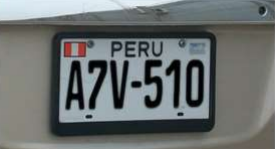

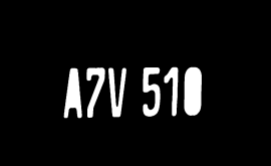

Cómo hacerlo?

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Método Otsu


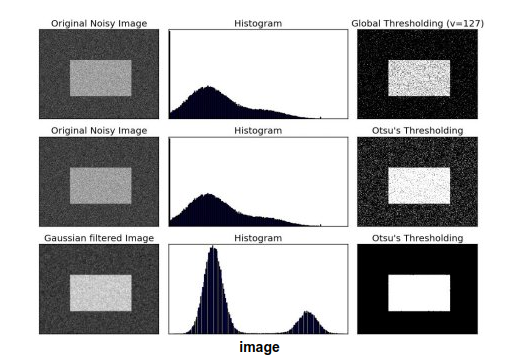

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargando librerías
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios


Mostrando imagen de entrada


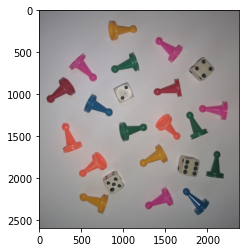

In [3]:
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de entrada')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Canal rojo


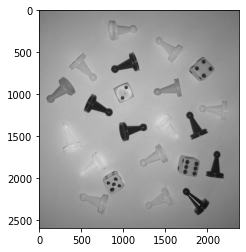


Canal verde


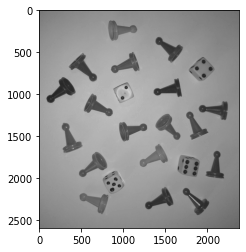


Canal azul


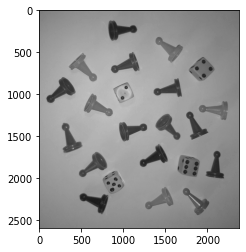


Grises


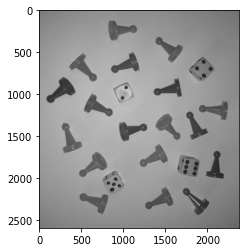

In [ ]:
#Mostrando cada canal de color y transformanndo a grises
Rojo=Imagen[:,:,0]
print('Canal rojo')
plt.imshow(Rojo.astype('uint8'),vmin=0, vmax=255,cmap='gray')
plt.show()
print('')

Verde=Imagen[:,:,1]
print('Canal verde')
plt.imshow(Verde.astype('uint8'),vmin=0, vmax=255,cmap='gray')
plt.show()
print('')

Azul=Imagen[:,:,2]
print('Canal azul')
plt.imshow(Azul.astype('uint8'),vmin=0, vmax=255,cmap='gray')
plt.show()
print('')

Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
print('Grises')
plt.imshow(Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray')
plt.show()
print('')

Identificando fichas de color naranja


Region Naranja


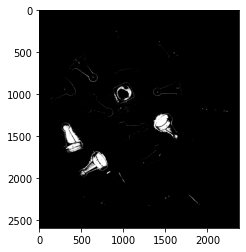

In [ ]:
[Fl, Cl, Ch]=Imagen.shape
Bin_Naranja = np.zeros((Fl,Cl,Ch))
Bin_Naranja = Rojo > 195
print('Region Naranja')
plt.imshow(Bin_Naranja.astype('uint8'),vmin=0, vmax=1,cmap='gray')
plt.show()
print('')

Fichas Naranja


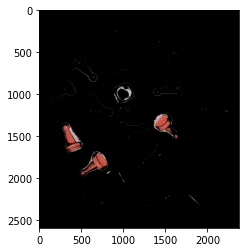

In [ ]:
Resultado_Naranja = np.zeros((Fl,Cl,Ch))
Resultado_Naranja[:,:,0]=Imagen[:,:,0]*Bin_Naranja
Resultado_Naranja[:,:,1]=Imagen[:,:,1]*Bin_Naranja
Resultado_Naranja[:,:,2]=Imagen[:,:,2]*Bin_Naranja
print('Fichas Naranja')
plt.imshow(Resultado_Naranja.astype('uint8'),vmin=0, vmax=255)
plt.show()
print('')

In [ ]:
print(Imagen[1500,380,:])

[202  86  73]


Mejorando el resultado a partir de 2 condiciones

Region Naranja


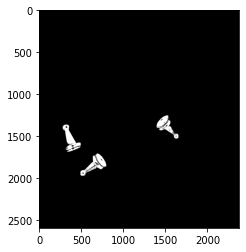


Fichas Naranja


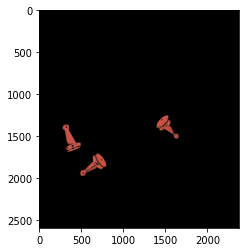

In [ ]:
[Fl, Cl, Ch]=Imagen.shape
Resultado_Naranja = np.zeros((Fl,Cl,Ch))
Bin_Naranja = np.zeros((Fl,Cl,Ch))
Bin_Naranja = (Rojo > 190)*(Verde < 100)*(Azul < 100)
print('Region Naranja')
plt.imshow(Bin_Naranja.astype('uint8'),vmin=0, vmax=1,cmap='gray')
plt.show()
print('')

Resultado_Naranja[:,:,0]=Imagen[:,:,0]*Bin_Naranja
Resultado_Naranja[:,:,1]=Imagen[:,:,1]*Bin_Naranja
Resultado_Naranja[:,:,2]=Imagen[:,:,2]*Bin_Naranja
print('Fichas Naranja')
plt.imshow(Resultado_Naranja.astype('uint8'),vmin=0, vmax=255)
plt.show()
print('')

In [ ]:
#Buscando las fucsias
print(Imagen[620,500,:])

[162  65 116]


Region Fucsia


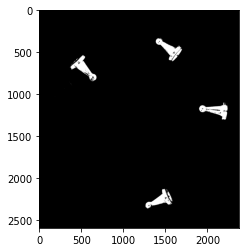


Fichas Fucsia


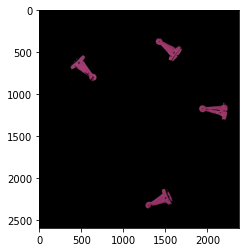

In [ ]:
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fucsia = np.zeros((Fl,Cl,Ch))
Bin_Fucsia = np.zeros((Fl,Cl,Ch))
Bin_Fucsia = (Rojo > 140)*(Rojo < 170)*(Verde < 80)*(Verde > 40)*(Azul > 90)*(Azul < 135)
print('Region Fucsia')
plt.imshow(Bin_Fucsia.astype('uint8'),vmin=0, vmax=1,cmap='gray')
plt.show()
print('')

Resultado_Fucsia[:,:,0]=Imagen[:,:,0]*Bin_Fucsia
Resultado_Fucsia[:,:,1]=Imagen[:,:,1]*Bin_Fucsia
Resultado_Fucsia[:,:,2]=Imagen[:,:,2]*Bin_Fucsia
print('Fichas Fucsia')
plt.imshow(Resultado_Fucsia.astype('uint8'),vmin=0, vmax=255)
plt.show()
print('')

# Segmentación en el espacio de color HSV

Analizando la imagen desde el canal de color HSV. Este es un espacio de color que expresa la información de las imágenes, a través del tono, la intensidad y la saturación.

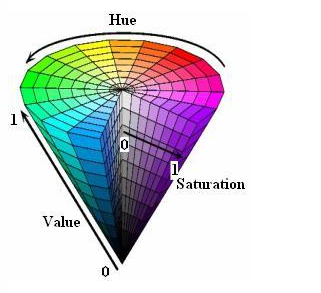

In [ ]:
#Cargando librerías
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

Mostrando imagen de entrada


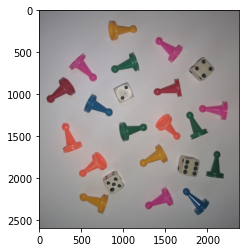

In [ ]:
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
print('Mostrando imagen de entrada')
plt.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Mostrando gráficos en HSV


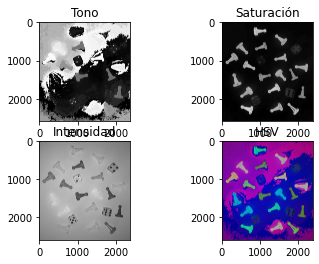

In [ ]:
#Transformando del canal de color RGB al HSV
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Imprimiendo
print('Mostrando gráficos en HSV')
fig, axs =plt.subplots(2, 2)
axs[0, 0].imshow(Hue.astype('uint8'),vmin=0, vmax=179,cmap='gray')
axs[0, 0].set_title('Tono')
axs[0, 1].imshow(Saturation.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 1].set_title('Saturación')
axs[1, 0].imshow(Value.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 0].set_title('Intensidad')
axs[1, 1].imshow(Imagen_hsv.astype('uint8'),vmin=0, vmax=255,cmap='hsv')
axs[1, 1].set_title('HSV')
plt.show()
print('')

Ejercicio_ parte 1: Segmentando las fichas.

Mostrando gráficos en RGB & HSV


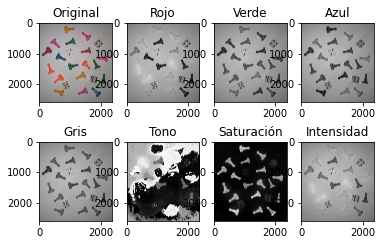


Imprimiendo resultado de segmentación


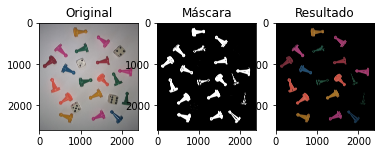

True

In [ ]:
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
#Extracción de canales en HSV
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Extracción de canales en RGB
Imagen=Imagen[:,:,[2,1,0]]#Organiza
Rojo=Imagen[:,:,0]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,2]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
#Imprimiendo
print('Mostrando gráficos en RGB & HSV')
fig, axs =plt.subplots(2, 4)
axs[0, 0].imshow(Imagen.astype('uint8'),vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(Rojo.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 1].set_title('Rojo')
axs[0, 2].imshow(Verde.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 2].set_title('Verde')
axs[0, 3].imshow(Azul.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 3].set_title('Azul')
axs[1, 0].imshow(Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 0].set_title('Gris')
axs[1, 1].imshow(Hue.astype('uint8'),vmin=0, vmax=179,cmap='gray')
axs[1, 1].set_title('Tono')
axs[1, 2].imshow(Saturation.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 2].set_title('Saturación')
axs[1, 3].imshow(Value.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 3].set_title('Intensidad')
plt.show()
print('')

#Segmentar fichas
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fichas = np.zeros((Fl,Cl,Ch))
Bin_Fichas = np.zeros((Fl,Cl,Ch))
Bin_Fichas = (Saturation > 130)*(Saturation < 250)

Resultado_Fichas[:,:,0]=Imagen[:,:,0]*Bin_Fichas
Resultado_Fichas[:,:,1]=Imagen[:,:,1]*Bin_Fichas
Resultado_Fichas[:,:,2]=Imagen[:,:,2]*Bin_Fichas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3)
axs1.imshow(Imagen.astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas.astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

#Guardando resultado en directorio destino
Destino = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/'
Nombre= 'Caso_1_Segmentado.bmp'
os.chdir(Destino)
cv2.imwrite(Nombre, Resultado_Fichas[:,:,[2,1,0]])


Ejercicio_parte 2: Segmentando un color específico.

Imprimiendo resultado de segmentación


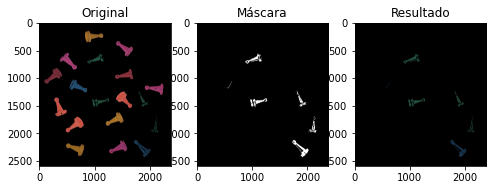

In [ ]:
#Buscando fichas verdes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/Caso_1_Segmentado.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
#Extracción de canales en HSV
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Extracción de canales en RGB
Imagen=Imagen[:,:,[2,1,0]]#Organiza
Rojo=Imagen[:,:,0]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,2]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)

#Segmentar fichas verdes
Bin_Fichas_Verdes = (Hue > 60)*(Hue < 120)*(Value < 90)*(Rojo < 70)
#Organizando resultado
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fichas_V = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_V[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Verdes
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen.astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Verdes.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_V.astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

# Segmentando con función Thresholding OpenCV.

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59

In [ ]:
#Cargando librerías
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios


Mostrando imagen de entrada


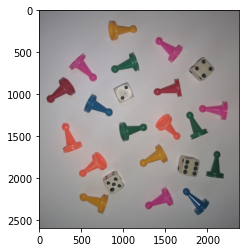

In [ ]:
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/10/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
Imagen=Imagen[:,:,[2,1,0]]#Organiza
print('Mostrando imagen de entrada')
plt.imshow(Imagen.astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Mostrando gráficos en RGB & HSV


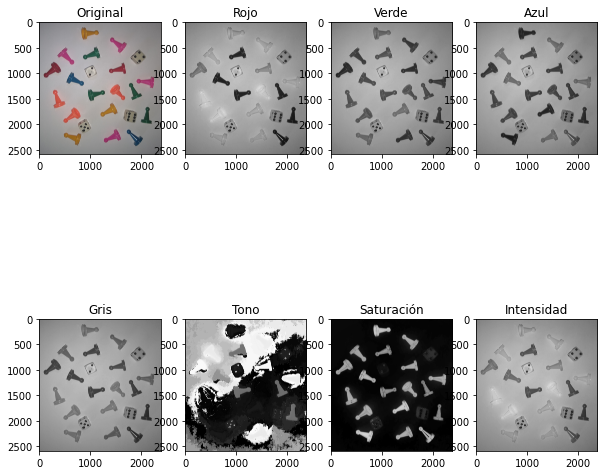

In [ ]:
#Extracción de canales en HSV
Imagen=Imagen[:,:,[2,1,0]]
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Extracción de canales en RGB
#Imagen=Imagen[:,:,[2,1,0]]#Organiza
Rojo=Imagen[:,:,2]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,0]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
#Mostrando en pantalla
print('Mostrando gráficos en RGB & HSV')
fig, axs =plt.subplots(2, 4,figsize=(10,10))
axs[0, 0].imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(Rojo.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 1].set_title('Rojo')
axs[0, 2].imshow(Verde.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 2].set_title('Verde')
axs[0, 3].imshow(Azul.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 3].set_title('Azul')
axs[1, 0].imshow(Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 0].set_title('Gris')
axs[1, 1].imshow(Hue.astype('uint8'),vmin=0, vmax=179,cmap='gray')
axs[1, 1].set_title('Tono')
axs[1, 2].imshow(Saturation.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 2].set_title('Saturación')
axs[1, 3].imshow(Value.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 3].set_title('Intensidad')
plt.show()
print('')

Imprimiendo resultado de segmentación


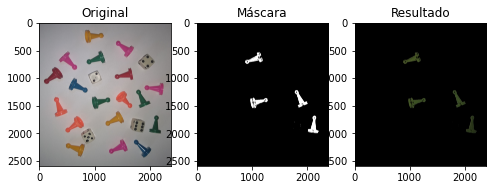

In [ ]:
#Segmentando fichas verde
[Fl, Cl, Ch]=Imagen.shape
Bin_Fichas_Verdes =np.zeros((Fl,Cl))
Bin_Fichas_Verdes = (Hue > 70)*(Hue < 85)*(Rojo < 50)
#Organizando resultado
Resultado_Fichas_V = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_V[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Verdes
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Verdes.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_V.astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

Imprimiendo resultado de segmentación


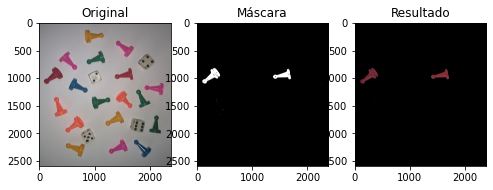

In [ ]:
#Buscando fichas rojas
Bin_Fichas_Rojas =np.zeros((Fl,Cl))
Bin_Fichas_Rojas = (Hue > 170)*(Hue < 180)*(Saturation > 130)
#Organizando resultado
Resultado_Fichas_R = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_R[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Rojas
Resultado_Fichas_R[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Rojas
Resultado_Fichas_R[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Rojas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Rojas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_R[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

#Actividad

1. Realice la segmentación de los colores de fichas adicionales al trabajo realizado en clase.
2. Realice un algortimo para que tome como entrada la imagen original de caso 1, y genere como salida la imagen de caso 1 segmentada